In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [8]:
basketball_player_data = pd.read_csv('C:/Users/danie/OneDrive/DSC-640/week7_8/ex5-2/ppg2008.csv')
costcos_map_data = pd.read_csv('C:/Users/danie/OneDrive/DSC-640/week7_8/ex5-2/costcos-geocoded.csv')

In [9]:
basketball_player_data.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [62]:
basketball_player_data.loc[:, 'Name  ']

0           Dwyane Wade 
1          LeBron James 
2           Kobe Bryant 
3         Dirk Nowitzki 
4         Danny Granger 
5          Kevin Durant 
6          Kevin Martin 
7          Al Jefferson 
8            Chris Paul 
9       Carmelo Anthony 
10           Chris Bosh 
11          Brandon Roy 
12       Antawn Jamison 
13          Tony Parker 
14     Amare Stoudemire 
15          Joe Johnson 
16         Devin Harris 
17         Michael Redd 
18           David West 
19     Zachary Randolph 
20         Caron Butler 
21         Vince Carter 
22      Stephen Jackson 
23           Ben Gordon 
24        Dwight Howard 
25          Paul Pierce 
26        Al Harrington 
27       Jamal Crawford 
28             Yao Ming 
29    Richard Jefferson 
30          Jason Terry 
31       Deron Williams 
32           Tim Duncan 
33          Monta Ellis 
34             Rudy Gay 
35            Pau Gasol 
36       Andre Iguodala 
37       Corey Maggette 
38            O.J. Mayo 
39         John Salmons 


In [63]:
len(basketball_player_data.columns)

21

In [64]:
len(basketball_player_data.loc[:, 'Name  '])

50

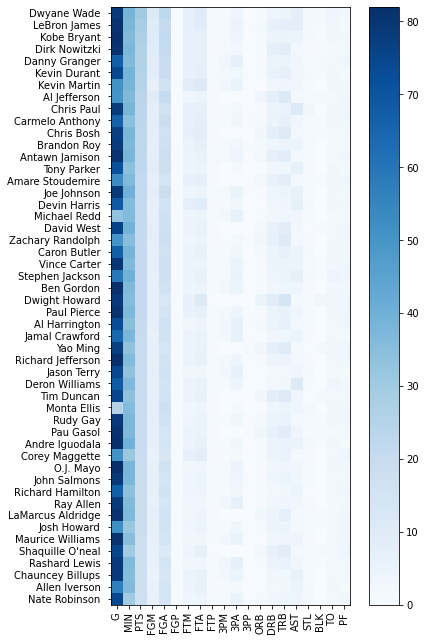

In [66]:
plt.figure(figsize=(7, 11))

plt.yticks(np.arange(len(basketball_player_data.loc[:, 'Name  '])), labels = basketball_player_data['Name  '])
plt.xticks(np.arange(len(basketball_player_data.columns) - 1), labels = basketball_player_data.columns[basketball_player_data.columns != 'Name  '], rotation=90)
his = plt.imshow(basketball_player_data.loc[:, basketball_player_data.columns != 'Name  '], cmap = "Blues", interpolation="nearest")
plt.colorbar(his)

In [5]:
costcos_map_data.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


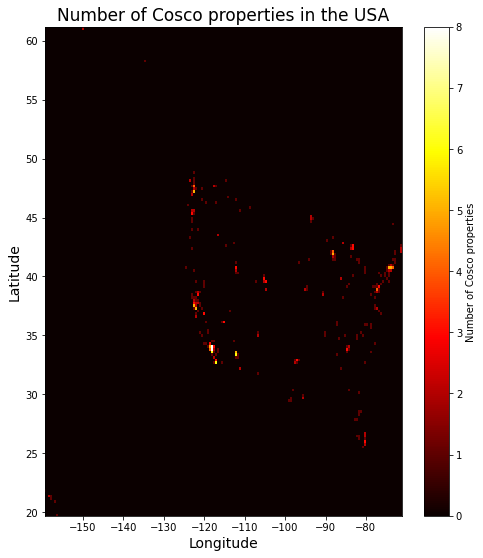

In [81]:
plt.figure(figsize = (8,9))
plt.hist2d(costcos_map_data.Longitude, costcos_map_data.Latitude, bins=180, cmap='hot')
plt.colorbar().set_label('Number of Cosco properties')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Number of Cosco properties in the USA', fontsize=17)
plt.show()

In [106]:
# Label encoding to simple integer 

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
costcos_map_data["enc"] = ord_enc.fit_transform(costcos_map_data[["State"]])
costcos_map_data[["State", "enc"]].head(11)

,State,enc
0,Alabama,0.0
1,Alabama,0.0
2,Alabama,0.0
3,Alaska,1.0
4,Alaska,1.0
5,Alaska,1.0
6,Arizona,2.0
7,Arizona,2.0
8,Arizona,2.0
9,Arizona,2.0


In [116]:
X, Y = np.meshgrid(basketball_player_data['MIN'], basketball_player_data['PTS'])

In [142]:
Z = X + Y 

<ipython-input-143-f984ee834bbb>:10: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(CS, shrink=0.8, extend='both')


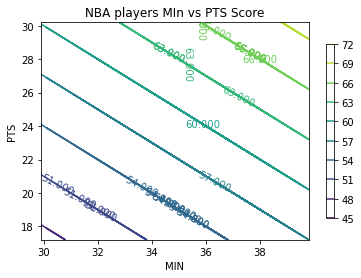

In [143]:
CS = plt.contour(basketball_player_data['MIN'], basketball_player_data['PTS'], Z)

plt.title('NBA players MIn vs PTS Score')
plt.xlabel('MIN')
plt.ylabel('PTS')



plt.clabel(CS, inline=1, fontsize=10)
plt.colorbar(CS, shrink=0.8, extend='both')